# Projet 07 : Effectuer une prédiction de revenus

---
**Importation des librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.colors as plc
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import modules_perso.sf_graphiques as sfg

---
## <font color=blue>Mission 4 : Modélisation du revenu des individus</font>

### 4.8.d. ANOVA du logarithme du revenu basée sur le logarithme du revenu moyen et l'indice de Gini du pays, sur la classe de revenu des parents et sur le coefficient d'élasticité

In [4]:
data = pd.read_csv("data_analyse11.csv", index_col=0)
data.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ln_child_income,ln_revenu_moyen,gini_from_centiles,parent_centile,coef_elasticite
0,6.591534,8.004643,32.141019,1,0.815874
1,6.591534,8.004643,32.141019,1,0.815874
2,6.591534,8.004643,32.141019,1,0.815874
3,6.591534,8.004643,32.141019,1,0.815874
4,6.591534,8.004643,32.141019,1,0.815874


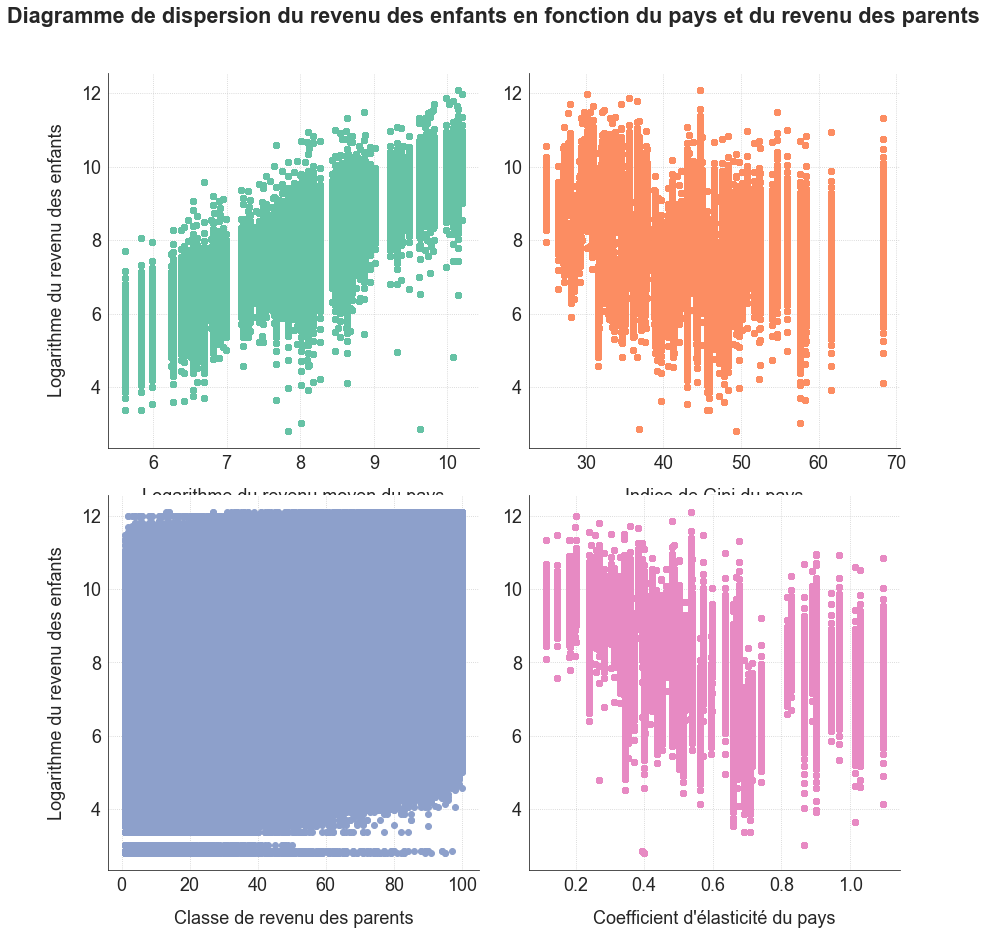

In [5]:
mygraph = sfg.MyGraph("Diagramme de dispersion du revenu des enfants en fonction du pays et du revenu des parents", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.ln_revenu_moyen, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, data.ln_child_income, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.parent_centile, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(data.coef_elasticite, data.ln_child_income, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=4)
mygraph.set_axe('x', label="Logarithme du revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de Gini du pays", multi_index=2)
mygraph.set_axe('x', label="Classe de revenu des parents", multi_index=3)
mygraph.set_axe('x', label="Coefficient d'élasticité du pays", multi_index=4)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=1)
mygraph.set_axe('y', label="Logarithme du revenu des enfants", multi_index=3)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova11_00_diagramme_dispersion.png")
plt.show()

Ces graphiques confirment encore une fois la pertinence de considérer le logarithme des revenus. La relation linéaire croissante entre le logarithme du revenu des enfants et le logarithme du revenu moyen du pays se dessine nettement. Le nuage de point du logarithme du revenu des enfants en fonction de l'indice de Gini ne montre pas de relation évidente mais est bien moins dispersé qu'avant. Le nuage de points du logarithme du revenu des enfants en fonction de la classe des parents ne laisse pas non plus apparaître de relation évidente. Regardons les résultats de la régression linéaire.

In [6]:
anova = smf.ols(formula="ln_child_income ~ ln_revenu_moyen + gini_from_centiles + coef_elasticite + C(parent_centile)", data=data).fit()

In [7]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_child_income   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 2.034e+05
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:40:58   Log-Likelihood:            -5.4888e+06
No. Observations:             5642420   AIC:                         1.098e+07
Df Residuals:                 5642317   BIC:                         1.098e+07
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.3933      0.004   -102.759      0.000      -0.401      -0.386
C(parent_centile)[T.2]       0.1627      0.004     42.596      0.000       0.155       0.170
C(parent_centile)[T.3]       0.2418      0.004     63.319      0.000       0.234       0.249
C(parent_centile)[T.4]       0.2917      0.004     76.418      0.000       0.284       0.299
C(parent_centile)[T.5]       0.3300      0.004     86.451      0.000       0.323       0.338
C(parent_centile)[T.6]       0.3612      0.004     94.620      0.000       0.354       0.369
C(parent_centile)[T.7]       0.3919      0.004    102.703      0.000       0.384       0.399
C(parent_centile)[T.8]       0.4126      0.004    108.102      0.000       0.405       0.420
C(parent_centile)[T.9]       0.4384      0.004    114.886      0.000       0.431       0.446
C(parent_centile)[T.10]      0.4569      0.004    119.692      0.000       0.449       0.464
C(parent_centile)[T.11]      0.4810      0.004    126.057      0.000       0.474       0.488
C(parent_centile)[T.12]      0.4949      0.004    129.668      0.000       0.487       0.502
C(parent_centile)[T.13]      0.5138      0.004    134.620      0.000       0.506       0.521
C(parent_centile)[T.14]      0.5268      0.004    138.031      0.000       0.519       0.534
C(parent_centile)[T.15]      0.5454      0.004    142.889      0.000       0.538       0.553
C(parent_centile)[T.16]      0.5558      0.004    145.667      0.000       0.548       0.563
C(parent_centile)[T.17]      0.5687      0.004    149.012      0.000       0.561       0.576
C(parent_centile)[T.18]      0.5839      0.004    153.047      0.000       0.576       0.591
C(parent_centile)[T.19]      0.5949      0.004    155.898      0.000       0.587       0.602
C(parent_centile)[T.20]      0.6086      0.004    159.538      0.000       0.601       0.616
C(parent_centile)[T.21]      0.6197      0.004    162.415      0.000       0.612       0.627
C(parent_centile)[T.22]      0.6274      0.004    164.404      0.000       0.620       0.635
C(parent_centile)[T.23]      0.6401      0.004    167.773      0.000       0.633       0.648
C(parent_centile)[T.24]      0.6507      0.004    170.554      0.000       0.643       0.658
C(parent_centile)[T.25]      0.6588      0.004    172.608      0.000       0.651       0.666
C(parent_centile)[T.26]      0.6744      0.004    176.760      0.000       0.667       0.682
C(parent_centile)[T.27]      0.6815      0.004    178.628      0.000       0.674       0.689
C(parent_centile)[T.28]      0.6921      0.004    181.413      0.000       0.685       0.700
C(parent_centile)[T.29]      0.7065      0.004    185.183      0.000       0.699       0.714
C(parent_centile)[T.30]      0.7151      0.004    187.413      0.000       0.708       0.723
C(parent_centi

In [8]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
C(parent_centile),6.228707e+05,99.0,1.535643e+04,0.000000,7.050741e-02,7.048985e-02
ln_revenu_moyen,5.830767e+06,1.0,1.423158e+07,0.000000,6.600283e-01,6.600280e-01
gini_from_centiles,6.878501e+04,1.0,1.678887e+05,0.000000,7.786292e-03,7.786114e-03
coef_elasticite,2.118476e+00,1.0,5.170721e+00,0.022971,2.398062e-07,6.257727e-08
Residual,2.311692e+06,5642317.0,NaN,NaN,NaN,NaN
total,8.834116e+06,5642419.0,NaN,NaN,NaN,NaN


La part de dispersion expliquée par le modèle (R²) est la même que pour le modèle 6 : 78,6% de la variance totale. De même, la qualité explicative, évaluée par l'AIC et le BIC, ne s'améliore pas. Elle n'augmente pas malgré l'ajout d'une variable explicative. Cela amène à rejeter ce modèle.